# 🧠 Heart Disease ML Project - Notebook 2: Dimensionality Reduction with PCA

In this notebook, we apply **Principal Component Analysis (PCA)** on the preprocessed training data to:
- Understand how many components are needed to retain 95% variance
- Reduce dimensionality for faster training and visualization
- Visualize the data in 2D and 3D using PCA components

---

## 📦 1. Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib
import plotly.express as px

## 📥 2. Load Preprocessed Data

We load the saved training and testing sets from the preprocessing step.


In [2]:
X_train = pd.read_csv('/content/heart_disease_train.csv')
X_test = pd.read_csv('/content/heart_disease_test.csv')
y_train = pd.read_csv('/content/heart_disease_train_target.csv')
y_test = pd.read_csv('/content/heart_disease_test_target.csv')

## 📊 3. Apply PCA to Explore Explained Variance

We first apply PCA without limiting the number of components to analyze cumulative explained variance.


In [3]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

### 🔍 Cumulative Explained Variance Plot


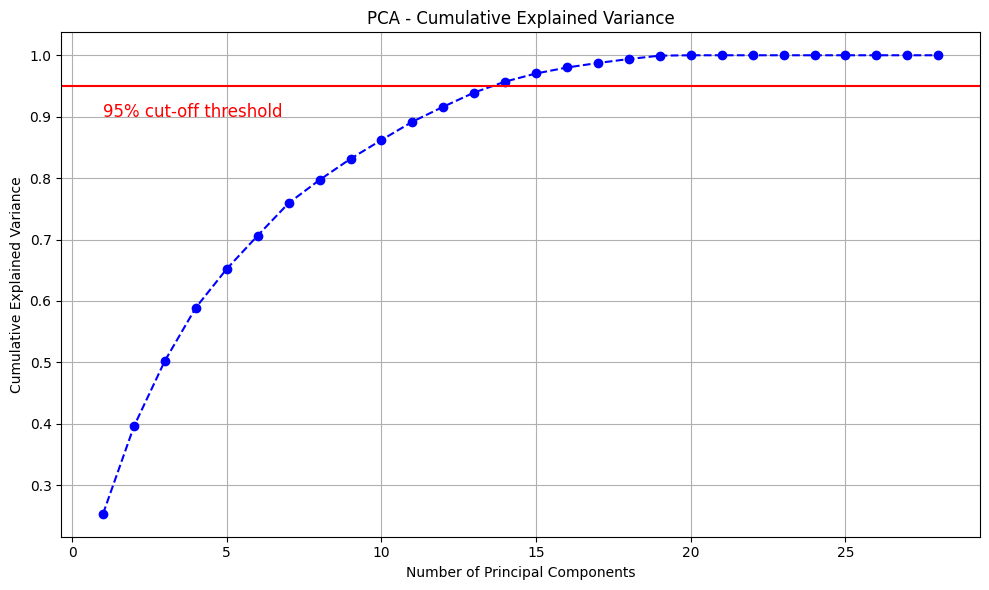

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o',
    linestyle='--',
    color='blue'
)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-', linewidth=1.5)
plt.text(1, 0.90, '95% cut-off threshold', color='red', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('pca_variance.png')
plt.show()

## ✅ 4. Select Optimal Number of Components (≥95% Variance)


In [5]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"[INFO] Number of PCA components explaining ≥95% variance: {n_components}")

[INFO] Number of PCA components explaining ≥95% variance: 14


## 🧮 5. Re-apply PCA with Optimal Components

In [6]:
pca_final = PCA(n_components=n_components)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

# Save PCA model
joblib.dump(pca_final, 'pca_model.pkl')
print("[INFO] PCA model saved as 'pca_model.pkl'")

[INFO] PCA model saved as 'pca_model.pkl'


## 🔵 6. 2D PCA Scatter Plot (PC1 vs PC2)


In [7]:
pca_df_2d = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
pca_df_2d['target'] = y_train.values

fig_2d = px.scatter(
    pca_df_2d,
    x='PC1',
    y='PC2',
    color='target',
    title='2D PCA Scatter Plot (PC1 vs PC2)',
    color_discrete_map={0: 'steelblue', 1: 'crimson'},
    labels={'target': 'Heart Disease'},
    template='plotly_white',
    width=800,
    height=600
)
fig_2d.update_traces(marker=dict(size=6, opacity=0.8, line=dict(width=0.5, color='black')))
fig_2d.write_html('pca_2d_plot.html')
fig_2d.show()

## 🟢 7. 3D PCA Scatter Plot (PC1 vs PC2 vs PC3)


In [8]:
pca_df_3d = pd.DataFrame(X_train_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['target'] = y_train.values

fig_3d = px.scatter_3d(
    pca_df_3d,
    x='PC1',
    y='PC2',
    z='PC3',
    color='target',
    title='3D PCA Scatter Plot (PC1 vs PC2 vs PC3)',
    color_discrete_map={0: 'royalblue', 1: 'darkorange'},
    labels={'target': 'Heart Disease'},
    template='plotly_white',
    width=900,
    height=700
)
fig_3d.update_traces(marker=dict(size=5, opacity=0.8))
fig_3d.write_html('pca_3d_plot.html')
fig_3d.show()